Found 568 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


C:\Users\hussa\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5768 - loss: 1.0442 - val_accuracy: 0.7250 - val_loss: 0.5752
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6377 - loss: 0.7648 - val_accuracy: 0.7500 - val_loss: 0.5770
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6658 - loss: 0.7107 - val_accuracy: 0.7500 - val_loss: 0.5810
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6724 - loss: 0.7411 - val_accuracy: 0.7500 - val_loss: 0.5636
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6838 - loss: 0.6959 - val_accuracy: 0.7625 - val_loss: 0.6286
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7540 - loss: 0.5720 - val_accuracy: 0.7500 - val_loss: 0.5443
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7288 - loss: 0.5741 - val_accuracy: 0.7750 - val_loss: 0.5156
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6694 - loss: 0.6498 - val_accuracy: 0.7500 - val_loss:

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 391ms/step - accuracy: 0.7896 - loss: 0.4563
Test Accuracy: 0.70


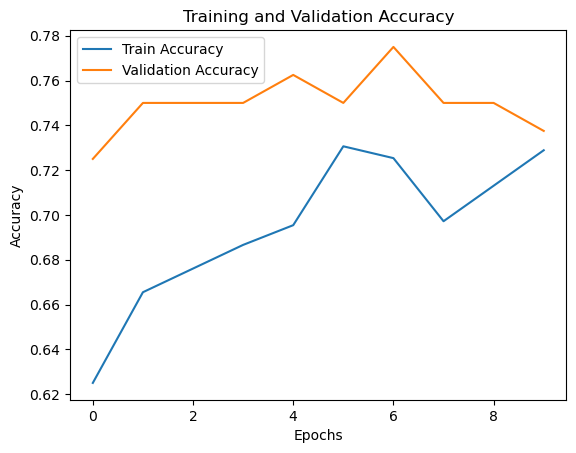

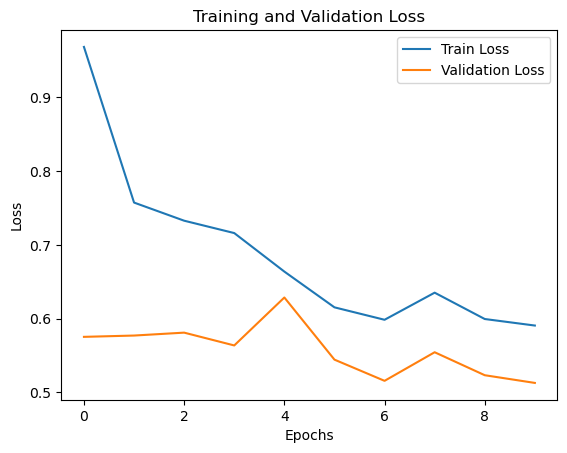

In [6]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import seaborn as sns


# Dataset directories
train_dir = r"C:\Users\hussa\Downloads\Myopia Classifier.v8-cropped-and-resized.folder\train"
val_dir = r"C:\Users\hussa\Downloads\Myopia Classifier.v8-cropped-and-resized.folder\valid"
test_dir = r"C:\Users\hussa\Downloads\Myopia Classifier.v8-cropped-and-resized.folder\test"

# Parameters
img_height, img_width = 224, 224
batch_size = 32
num_classes = len(os.listdir(train_dir))  # Should be 2: Myopia and Normal

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

# Load Pre-Trained MobileNetV2 Model
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False

# Build the Transfer Learning Model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax")
])

# Compile the Model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the Model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Fine-tune
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss="categorical_crossentropy", metrics=["accuracy"])
history_fine = model.fit(train_generator, epochs=5, validation_data=val_generator)

# Save the Model
model.save("myopia_classifier_model.h5")

# Evaluate the Model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

# Plot Training Results
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()


Found 50 images belonging to 2 classes.


C:\Users\hussa\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step
Test Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

      Myopia       0.70      1.00      0.82        35
      Normal       0.00      0.00      0.00        15

    accuracy                           0.70        50
   macro avg       0.35      0.50      0.41        50
weighted avg       0.49      0.70      0.58        50



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


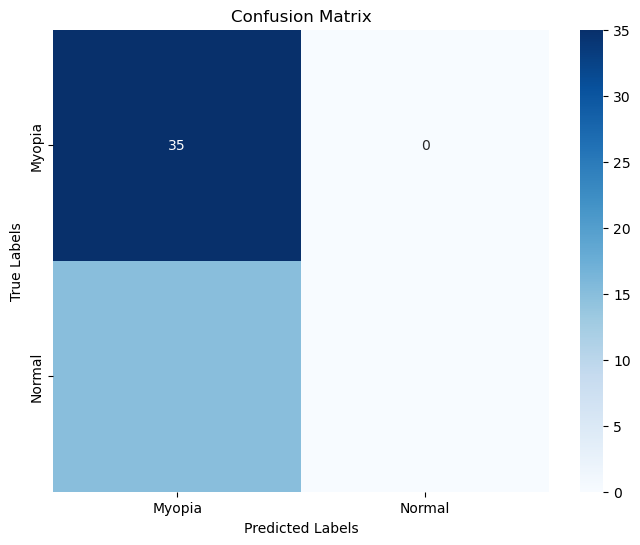

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Parameters
img_height, img_width = 224, 224
batch_size = 32
test_dir = r"C:\Users\hussa\Downloads\Myopia Classifier.v8-cropped-and-resized.folder\test"

# Load the trained model
model = load_model("myopia_classifier_model.h5")

# Re-create the test data generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False  # Ensure labels align with predictions
)

# Predict on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
y_true = test_generator.classes  # True class labels

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Print accuracy score
acc_score = accuracy_score(y_true, y_pred_classes)
print(f"Test Accuracy: {acc_score:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


Found 50 images belonging to 2 classes.


C:\Users\hussa\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
Test Accuracy: 0.70

Raw Confusion Matrix:
[[35  0]
 [15  0]]

Classification Report:
              precision    recall  f1-score   support

      Myopia       0.70      1.00      0.82        35
      Normal       0.00      0.00      0.00        15

    accuracy                           0.70        50
   macro avg       0.35      0.50      0.41        50
weighted avg       0.49      0.70      0.58        50



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


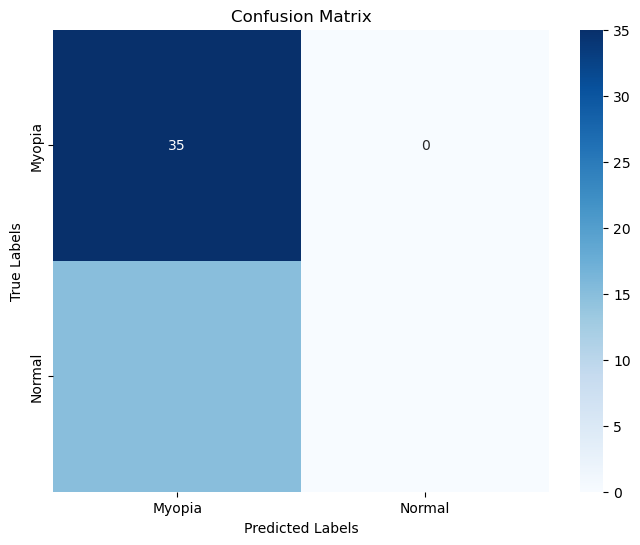

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Parameters
img_height, img_width = 224, 224
batch_size = 32
test_dir = r"C:\Users\hussa\Downloads\Myopia Classifier.v8-cropped-and-resized.folder\test"

# Load the trained model
model = load_model("myopia_classifier_model.h5")

# Re-create the test data generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False  # Ensure labels align with predictions
)

# Predict on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
y_true = test_generator.classes  # True class labels

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Print accuracy score
acc_score = accuracy_score(y_true, y_pred_classes)
print(f"Test Accuracy: {acc_score:.2f}")

# Print raw confusion matrix
print("\nRaw Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
